<a href="https://colab.research.google.com/github/Machine-Learning-Moron/Transfer-Learning-Practice-Notebooks/blob/main/TransferLearning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/kaggleflowersdata'

In [5]:
%cd /content/gdrive/MyDrive/kaggleflowersdata

/content/gdrive/MyDrive/kaggleflowersdata


In [6]:
!ls

flowers-recognition  kaggle.json


In [7]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 96% 434M/450M [00:04<00:00, 86.6MB/s]
100% 450M/450M [00:05<00:00, 92.8MB/s]


In [8]:
!mkdir flowers-recognition
!mv flowers-recognition.zip flowers-recognition

mkdir: cannot create directory ‘flowers-recognition’: File exists


In [9]:
%cd flowers-recognition/

/content/gdrive/My Drive/kaggleflowersdata/flowers-recognition


In [10]:
# !unzip flowers-recognition.zip

In [11]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import cv2       # open CV
import os
import tensorflow as tf
import keras
# Data manipulation & visulation
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# data augmentation
from keras.preprocessing.image import ImageDataGenerator

#model creation and evaluation 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder

from keras.layers import Dense
from keras.layers import Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop, SGD
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.callbacks import ReduceLROnPlateau


import random as rn
from tqdm import tqdm

In [12]:
print(os.listdir('/content/gdrive/MyDrive/kaggleflowersdata/flowers-recognition/flowers'))

['daisy', 'dandelion', 'flowers', 'rose', 'sunflower', 'tulip']


In [13]:
Daisy_flower_dir = '/content/gdrive/MyDrive/kaggleflowersdata/flowers-recognition/flowers/daisy'
Sunflower_flower_dir = '/content/gdrive/MyDrive/kaggleflowersdata/flowers-recognition/flowers/sunflower'
Tulip_flower_dir = '/content/gdrive/MyDrive/kaggleflowersdata/flowers-recognition/flowers/tulip'
Dandelion_flower_dir = '/content/gdrive/MyDrive/kaggleflowersdata/flowers-recognition/flowers/dandelion'
Rose_flower_dir = '/content/gdrive/MyDrive/kaggleflowersdata/flowers-recognition/flowers/rose'

In [14]:
images = []
labels = []
img_size = 150

def image_data(flower_name, DIR):
    for i in tqdm(os.listdir(DIR)):
        try:
            
            path = os.path.join(DIR,i)
            img = cv2.imread(path)
            img = cv2.resize(img, (img_size, img_size))
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
            images.append(np.array(img))
            labels.append(str(flower_name))
            
        except:
            print(path)
            

In [15]:
image_data('Daisy', Daisy_flower_dir)
len(images)

100%|██████████| 769/769 [04:54<00:00,  2.61it/s]


769

In [16]:
image_data('Sunflower', Sunflower_flower_dir)
len(images)

100%|██████████| 734/734 [05:23<00:00,  2.27it/s]


1503

In [17]:
image_data('Tulip', Tulip_flower_dir)
len(images)

100%|██████████| 984/984 [06:33<00:00,  2.50it/s]


2487

In [18]:
image_data('Dandelion', Dandelion_flower_dir)
len(images)

 83%|████████▎ | 879/1055 [05:32<01:13,  2.41it/s]

/content/gdrive/MyDrive/kaggleflowersdata/flowers-recognition/flowers/dandelion/flickr.py


 86%|████████▌ | 908/1055 [05:43<00:53,  2.73it/s]

/content/gdrive/MyDrive/kaggleflowersdata/flowers-recognition/flowers/dandelion/run_me.py


 94%|█████████▎| 987/1055 [06:19<00:29,  2.28it/s]

/content/gdrive/MyDrive/kaggleflowersdata/flowers-recognition/flowers/dandelion/flickr.pyc


100%|██████████| 1055/1055 [06:49<00:00,  2.58it/s]


3539

In [19]:
image_data('Rose', Rose_flower_dir)
len(images)

100%|██████████| 784/784 [05:21<00:00,  2.44it/s]


4323

In [20]:
data = np.array(images)
labels = np.array(labels)
print('Input(Feature) Data shape :', data.shape)
print('Output(Labels) Data shape :', labels.shape)

Input(Feature) Data shape : (4323, 150, 150, 3)
Output(Labels) Data shape : (4323,)


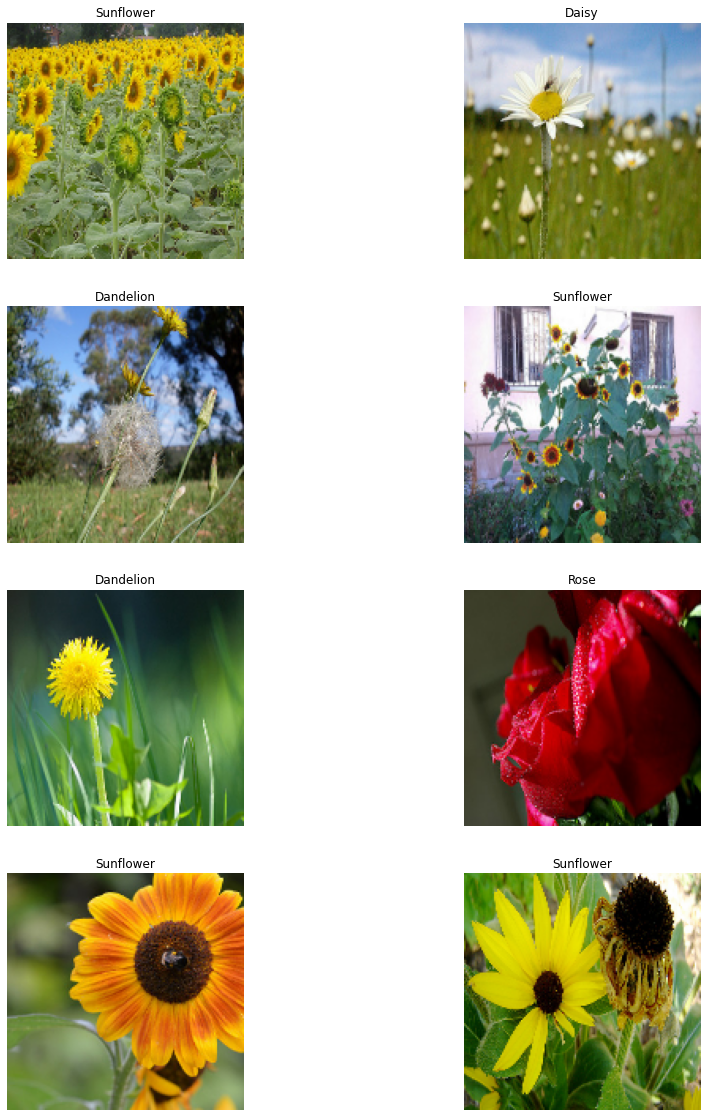

In [21]:
fig, ax = plt.subplots(4, 2, figsize = (15, 20))
for i in range(4):
    for j in range(2):
        l = rn.randint(0, data.shape[0])
        ax[i,j].imshow(data[l])
        ax[i,j].set_title(labels[l])
        ax[i,j].axis('off')

Text(0.5, 0, 'Class Number')

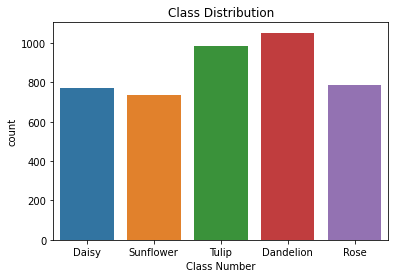

In [22]:
sns.countplot(labels)
plt.title("Class Distribution")
plt.xlabel("Class Number")

In [23]:
le = LabelEncoder()
y = le.fit_transform(labels)
y = to_categorical(y, 5)
y[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [24]:
# Normalize the input data in range [0 1]
X = data/255

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 5)

print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)
print("X_test shape :" ,X_test.shape)
print("y_test shape :",y_test.shape)

X_train shape : (3458, 150, 150, 3)
y_train shape : (3458, 5)
X_test shape : (865, 150, 150, 3)
y_test shape : (865, 5)


In [26]:
np.random.seed(40)
rn.seed(40)

## Call the BEAST

In [27]:
Base_model = VGG16(include_top= False, weights='imagenet',input_shape=(150,150,3), pooling='avg')
Base_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

* We are not using fully connected layers of VGG16 model(include_top= False). We will add it from our side because in VGG16 softmax layer has 1000 classes and We have only 5 classes.
* We are using pretrained weights of Imagenet
* This is a sumary of my base model not a actual model

## Add Fully Connected Layers

In [28]:
model = Sequential()

model.add(Base_model)
model.add(Dense(256,activation='relu'))
# adding prediction(softmax) layer
model.add(Dense(5,activation="softmax"))

In [29]:
# freeze layers that are already pre-trained(Base Model)
Base_model.trainable = False

### Setting a learning rate annealer-
To make the optimizer converge faster and closest to the global minimum of the loss function, an annealing method of the learning rate (LR) needs to be used.

In [30]:
reduc_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)

### Data augmentation

In [31]:
datagen = ImageDataGenerator(featurewise_center= False,
                              samplewise_center= False,
                              featurewise_std_normalization= False,
                              samplewise_std_normalization=False,
                              rotation_range= 10,        # 0- 180
                              zca_whitening=False,
                              zoom_range=0.1,            # Randomly zoom image
                              width_shift_range=0.2,     # randomly shift images horizontally (fraction of total width)
                              height_shift_range=0.2,    # randomly shift images vertically (fraction of total height)
                              horizontal_flip=True,      # randomly flip images
                              vertical_flip=False)       # randomly flip images
                             
datagen.fit(X_train)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 14,847,301
Trainable params: 132,613
Non-trainable params: 14,714,688
_________________________________________________________________


### Compiling and Training the Model

In [33]:
model.compile(optimizer=Adam(lr = 1e-4), loss= 'categorical_crossentropy', metrics=['accuracy'])

In [34]:
batch_size=64
model_history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = 50, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/50
54/54 [==============================] - 69s 416ms/step - loss: 1.5746 - accuracy: 0.2875 - val_loss: 1.4478 - val_accuracy: 0.4150
Epoch 2/50
54/54 [==============================] - 18s 327ms/step - loss: 1.4170 - accuracy: 0.4810 - val_loss: 1.3019 - val_accuracy: 0.5688
Epoch 3/50
54/54 [==============================] - 18s 328ms/step - loss: 1.2853 - accuracy: 0.5643 - val_loss: 1.1772 - val_accuracy: 0.6289
Epoch 4/50
54/54 [==============================] - 18s 327ms/step - loss: 1.1818 - accuracy: 0.6035 - val_loss: 1.0882 - val_accuracy: 0.6751
Epoch 5/50
54/54 [==============================] - 18s 325ms/step - loss: 1.0906 - accuracy: 0.6346 - val_loss: 1.0189 - val_accuracy: 0.6960
Epoch 6/50
54/54 [==============================] - 18s 327ms/step - loss: 1.0487 - accuracy: 0.6369 - val_loss: 0.9594 - val_accuracy: 0.7156
Epoch 7/50
54/54 [==============================] - 18s 333ms/step - loss: 0.9914 - accuracy: 0.6658 - val_loss: 0.9098 - val_accuracy: 0.7156